In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [5]:
from sklearn.datasets import fetch_olivetti_faces

# Încărcarea setului de date Olivetti Faces
data = fetch_olivetti_faces()
X = data.data
y = data.target

# Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [6]:
# Normalizarea datelor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducerea dimensionalității folosind PCA
pca = PCA(n_components=0.95)  # Păstrarea a


In [8]:
# Normalizarea datelor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducerea dimensionalității folosind PCA
pca = PCA(n_components=0.95)  # Păstrarea a

In [9]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Crearea modelului SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

# Evaluarea modelului SVM
y_pred_svm = svm_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_svm))

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(40, activation='softmax') # Schimbăm la 40 pentru numărul de clase din Olivetti Faces
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/10
10/10 [==============================] - 2s 43ms/step - loss: 6.5396 - accuracy: 0.0406 - val_loss: 4.4567 - val_accuracy: 0.0375
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 3.4390 - accuracy: 0.1781 - val_loss: 3.1445 - val_accuracy: 0.1750
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 2.2249 - accuracy: 0.4531 - val_loss: 2.4256 - val_accuracy: 0.3125
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 1.4737 - accuracy: 0.6687 - val_loss: 1.9312 - val_accuracy: 0.4375
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9667 - accuracy: 0.7937 - val_loss: 1.5942 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5902 - accuracy: 0.9187 - val_loss: 1.3142 - val_accuracy: 0.7125
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.3541 - accuracy: 0.9719 - val_loss: 1.0740 - val_accuracy: 0.8000
Epoch 8/10
10/10

In [18]:
# Evaluarea modelului DNN
y_pred_dnn = model.predict(X_test_pca)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)
print(classification_report(y_test, y_pred_dnn_classes))


3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.50      0.50      0.50         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      0.67      0.67         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         0
          17       1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import seaborn as sns

# Funcție modificată pentru a afișa matricea de confuzie
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(title)
    plt.ylabel('Adevărate')
    plt.xlabel('Prezise')
    plt.xticks(range(40), rotation=45)  # Ajustează pentru numărul de clase din Olivetti Faces
    plt.yticks(range(40))
    plt.show()


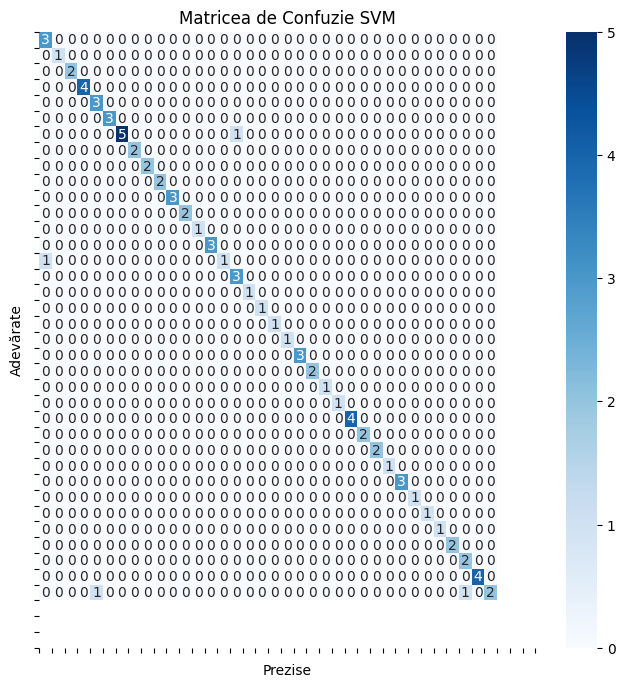

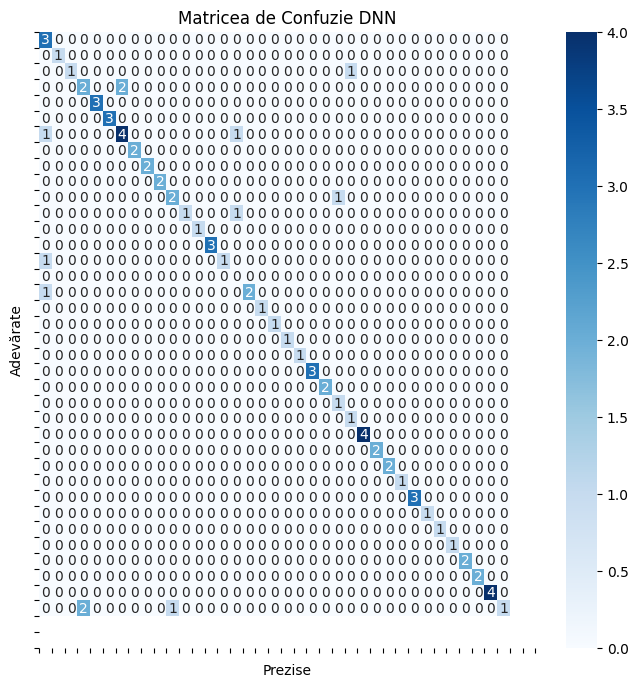

In [23]:
plot_confusion_matrix(y_test, y_pred_svm, 'Matricea de Confuzie SVM')
plot_confusion_matrix(y_test, y_pred_dnn_classes, 'Matricea de Confuzie DNN')